### White Noise

A special type of time-series, where the data doesn't follow a pattern.

A sequence of random data, where every value has a time-period associated with it.

# Importing Relevant Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

# Loading and Transforming Data

In [5]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

# Removing Surplus Data

In [6]:
df_comp['market_value'] = df_comp.spx
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

# White Noise

In [7]:
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))

In [8]:
df['wn'] = wn

/tmp/ipykernel_30055/672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [9]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1096.246808
std,292.559287,290.697428
min,438.920000,56.911973
25%,914.620000,900.288106
50%,1144.650000,1101.405376
75%,1316.280729,1294.234976
max,1570.252238,2121.275366


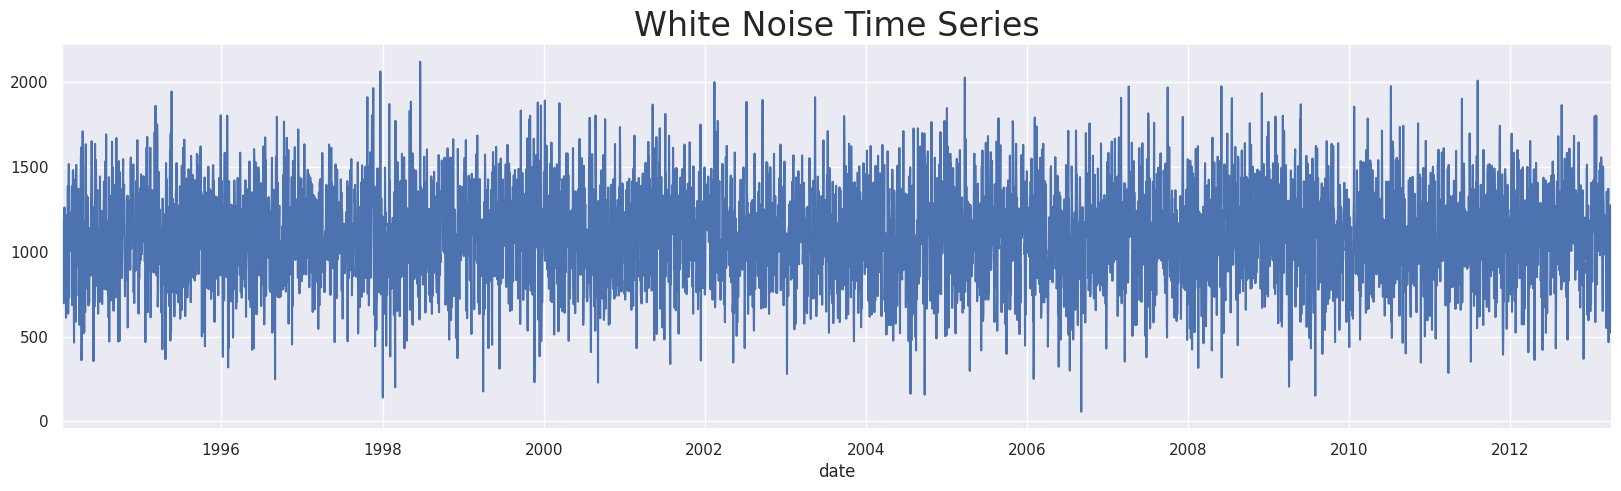

In [12]:
df.wn.plot(figsize=(20,5))
plt.title('White Noise Time Series', size=24)
plt.show()

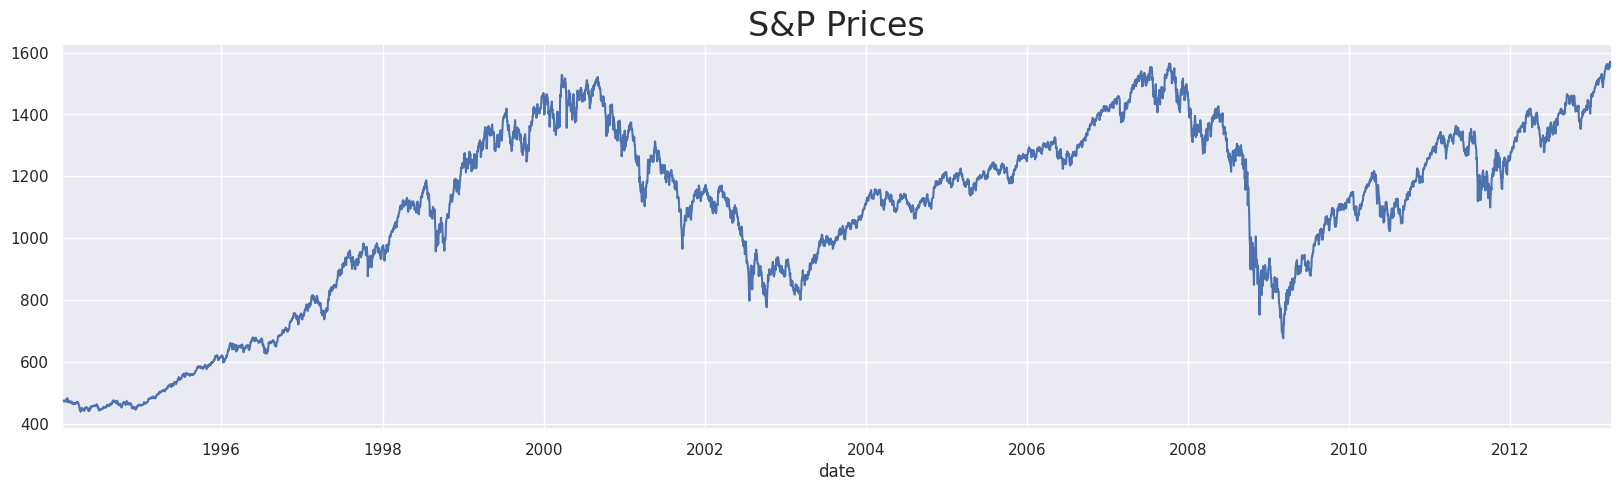

In [13]:
df.market_value.plot(figsize=(20,5))
plt.title('S&P Prices', size=24)
plt.show()

### Random Walk

A special type of time-series, where values tend to persist over time and the differences between periods are simply white noise.

In [14]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [15]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [17]:
df['rw'] = rw.price
df

/tmp/ipykernel_30055/2775213781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


,market_value,wn,rw
date,,,
1994-01-07,469.900000,898.538791,1122.139662
1994-01-10,475.270000,1186.585027,1080.347860
1994-01-11,474.130000,1172.398748,1082.095245
1994-01-12,474.170000,1125.805398,1083.639265
1994-01-13,472.470000,1048.911255,1067.146255
...,...,...,...
2013-04-01,1562.173837,1274.802968,2263.675474
2013-04-02,1570.252238,830.243891,2225.000870
2013-04-03,1553.686978,621.428198,2190.787688


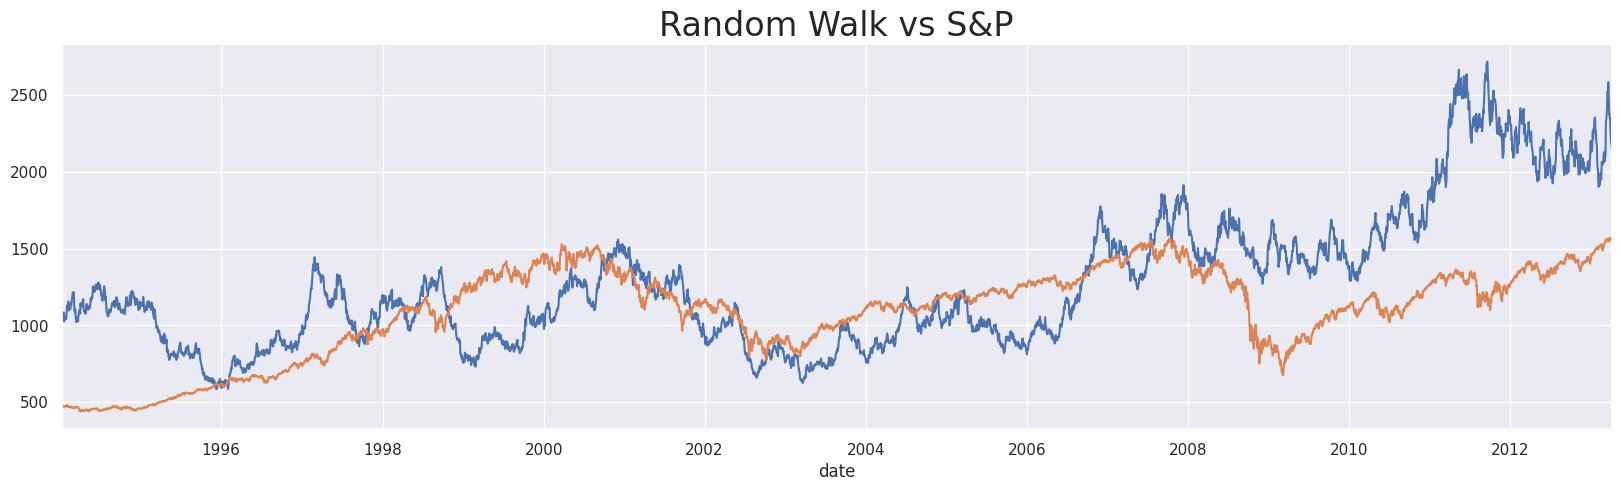

In [20]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size=24)
plt.show()